# Problem Set 2b

**By Adam Fattal**

Hope you did well on the theory section, but now it's time to test your qiskit knowledge. Learning how to use new tools can be pretty confusing at first so take your time and don't worry if you don't get it done the first time around. Most importantly, don't give up!

Importing Modules:

In [1]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.tools.visualization import plot_histogram
import numpy as np

## Problem 1:

In question 1 of Problem Set 2a, you were asked to verify the statevectors of three circuits. Build these circuits here and check your answer.

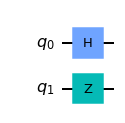

Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))

In [2]:
# Question 1 (a)

# Defining the circuit and the initial state |psi> = |00>
circ1 = QuantumCircuit(2)
psi1 = Statevector.from_label('00')

# Build your circuit here
circ1.h(0)
circ1.z(1)

# Drawing the circuit you built
display(circ1.draw('mpl'))

# Evolving the Statevector based on the circuit you constructed
psi1.evolve(circ1)

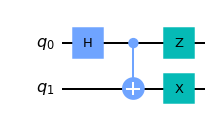

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))

In [3]:
# Question 1 (b)

# Defining the circuit and the initial state |psi> = |00>
circ2 = QuantumCircuit(2)
psi2 = Statevector.from_label('00')

# Build your circuit here
circ2.h(0)
circ2.cx(0,1)
circ2.z(0)
circ2.x(1)

# Draw the circuit you built
display(circ2.draw('mpl'))

# Evolve the Statevector based on the circuit you constructed:
psi2.evolve(circ2)

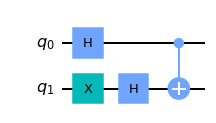

Statevector([ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
            dims=(2, 2))

In [5]:
# Question 1 (c)

# Defining the circuit and the initial state |psi> = |00>
circ3 = QuantumCircuit(2)
psi3 = Statevector.from_label('00')

# Build your circuit here
circ3.h(0)
circ3.x(1)
circ3.h(1)
circ3.cx(0,1)

# Draw the circuit you built
display(circ3.draw('mpl'))

# Evolve the Statevector based on the circuit you constructed:
psi3.evolve(circ3)

## Problem 2: 


Consider the 4 Bell states shown below.

$$|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

$$|\phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$$

$$|\psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$$

$$|\psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$$


For each one of them, do the following:
1. Build a circuit to get the state and draw it 
2. Run the circuit with 4200 shots and get counts
3. Plot counts on a histogram
4. Briefly discuss the difference between the four results

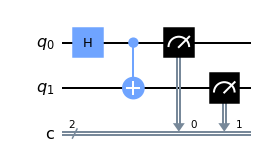

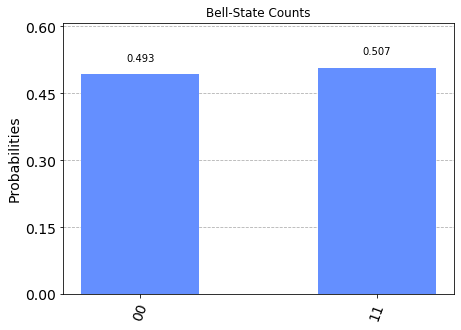

In [18]:
from qiskit import Aer

phiPlus = QuantumCircuit(2,2)

# Build and draw circuit
phiPlus.h(0)
phiPlus.cx(0,1)

phiPlus.measure([0,1],[0,1])

display(phiPlus.draw('mpl'))

# Simulate on Aer and get counts
backend = Aer.get_backend('qasm_simulator')
result = execute(phiPlus, backend, shots = 4200).result() # use result to get counts

output = result.get_counts(phiPlus)

# Plot histogram with counts
plot_histogram(output, title = 'Bell-State Counts')

In [16]:
Aer.backends()

[QasmSimulator(
 backend_name='qasm_simulator', provider=AerProvider()),
 StatevectorSimulator(
 backend_name='statevector_simulator', provider=AerProvider()),
 UnitarySimulator(
 backend_name='unitary_simulator', provider=AerProvider()),
 PulseSimulator(
 backend_name='pulse_simulator', provider=AerProvider())]

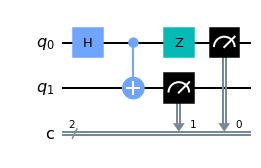

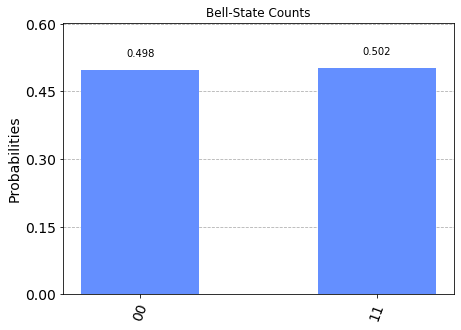

In [20]:
phiMinus = QuantumCircuit(2,2)

# Build and draw circuit

phiMinus.h(0)
phiMinus.cx(0,1)
phiMinus.z(0)

phiMinus.measure([0,1],[0,1])

display(phiMinus.draw('mpl'))

# Simulate on Aer and get counts
backend = Aer.get_backend('qasm_simulator')
result1 = execute(phiMinus, backend, shots = 4200).result() # use result to get counts

output1 = result1.get_counts(phiMinus)

# Plot histogram with counts
plot_histogram(output1, title = 'Bell-State Counts')


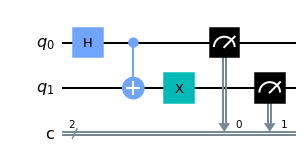

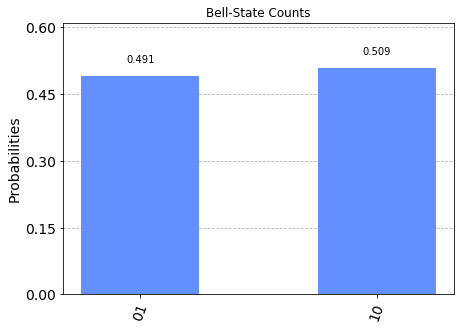

In [22]:
psiPlus = QuantumCircuit(2,2)

# Build and draw circuit

psiPlus.h(0)
psiPlus.cx(0,1)
psiPlus.x(1)

psiPlus.measure([0,1],[0,1])

display(psiPlus.draw('mpl'))

# Simulate on Aer and get counts
backend = Aer.get_backend('qasm_simulator')
result2 = execute(psiPlus, backend, shots = 4200).result() # use result to get counts

output2 = result2.get_counts(psiPlus)

# Plot histogram with counts
plot_histogram(output2, title = 'Bell-State Counts')


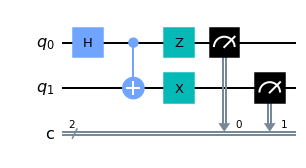

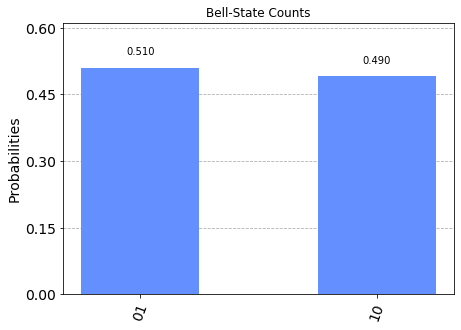

In [23]:
psiMinus = QuantumCircuit(2,2)

# Build and draw circuit

psiMinus.h(0)
psiMinus.cx(0,1)
psiMinus.z(0)
psiMinus.x(1)

psiMinus.measure([0,1],[0,1])

display(psiMinus.draw('mpl'))

# Simulate on Aer and get counts
backend = Aer.get_backend('qasm_simulator')
result3 = execute(psiMinus, backend, shots = 4200).result() # use result to get counts

output3 = result3.get_counts(psiMinus)

# Plot histogram with counts
plot_histogram(output3, title = 'Bell-State Counts')

## Problem 3: 

Run circuits of different lengths (maximum number of gates in a qubit) and sizes (number of qubits) both in a simulator and on real hardware. Compare your results to see if you notice any relation between length/size and the accuracy of the results on the real hardware. Remember, the simulator will give you **ideal** results, so, you can use that results as control.

In [11]:
from qiskit import IBMQ

IBMQ.save_account("73b599e84f41904c325f4af4fadeb8be89f08e609d1e22e7c2d36106ae383705e329075633e05e8ea3ff63abd006d949895a8da055508f6e4bdb3d851492a876") # Find your TOKEN by logging in to https://quantum-computing.ibm.com. Get help from Mentors if needed
IBMQ.load_account() 
IBMQ.providers() 

configrc.store_credentials:WARNING:2021-07-09 00:05:58,635: Credentials already present. Set overwrite=True to overwrite.
C:\Users\NISHA\AppData\Roaming\Python\Python37\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

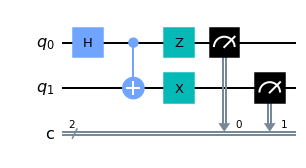

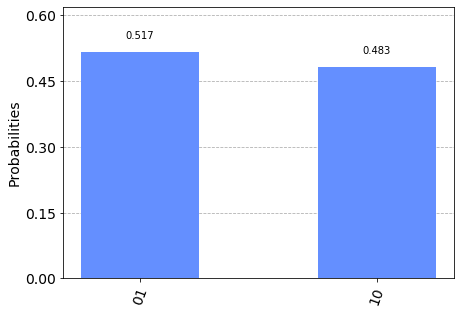

In [24]:
psiMinus = QuantumCircuit(2,2)

# Build and draw circuit

psiMinus.h(0)
psiMinus.cx(0,1)
psiMinus.z(0)
psiMinus.x(1)

psiMinus.measure([0,1],[0,1])

display(psiMinus.draw('mpl'))

# Simulate on Aer and get counts
backend = Aer.get_backend('qasm_simulator')
result4 = execute(psiMinus, backend, shots = 1024).result() # use result to get counts

output4 = result4.get_counts(psiMinus)

# Plot histogram with counts
plot_histogram(output4)

Job Status: job has successfully run


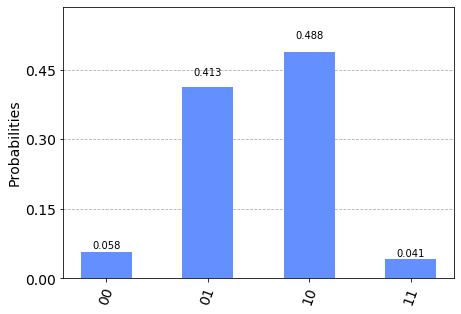

In [25]:
#run on real IBMQ hardware

provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_belem')
job = execute(psiMinus, backend = qcomp, shots= 1024)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result5 = job.result()

plot_histogram(result5.get_counts(psiMinus))

## Bonus:

According to 6.1 (pg 14) in <a href='https://arxiv.org/pdf/quant-ph/9503016.pdf'>this paper</a>, a controlled-controlled unitary gate, $CCU$ could be decomposed into the following:

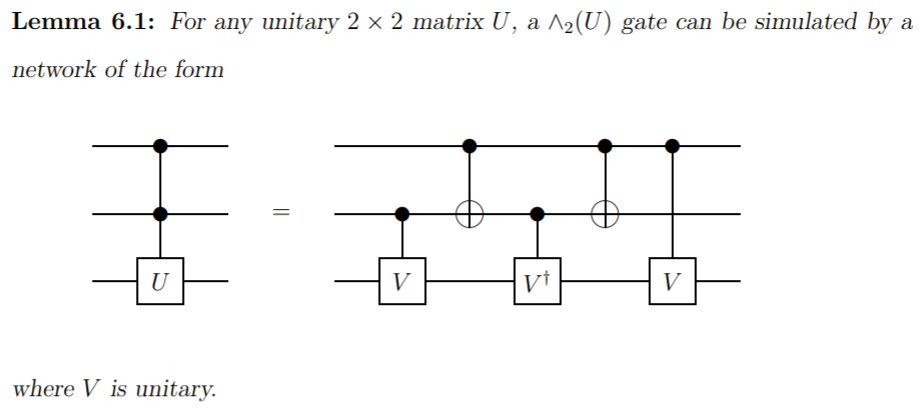

Where $V^2 = U$ ($V$ is the square root of the matrix $U$). Given the square root of the $X$ gate, $SX = \frac{1}{2}\begin{pmatrix} 1+i & 1-i \\1-i & 1+i\end{pmatrix}$, use the decomposition above to construct a $CCX$ gate. Confirm your result by getting either the unitary, the statevector of the circuit, or the counts.

Hint: [`UnitaryGate`](https://qiskit.org/documentation/stubs/qiskit.extensions.UnitaryGate.html) and [`UnitaryGate.control()`](https://qiskit.org/documentation/stubs/qiskit.extensions.UnitaryGate.html#qiskit.extensions.UnitaryGate.control).

This is a hard problem, feel free to ask mentors if you need any help!